<center><h1>TP Intelligence Artificielle</h1></center>

# Réalisé par: 
<center><h3> Rahma Sakka         07224862        IF5 Groupe b</h3></center>
<center><h3> Khairi Brahmi       11621651        IF5 Groupe b</h3></center>

# Données:

### Graphe des villes 

In [1]:
G=dict()
G['copenhagen']=['hamburg']
G['hamburg']=['amesterdam', 'berlin','copenhagen']
G['berlin']=['bern', 'prague','warsaw','hamburg']
G['warsaw']=['prague', 'vienna', 'budapest','berlin']
G['amesterdam']= ['munich','bern','brussels','hamburg']
G['brussels']= ['bern','genoa','paris','amesterdam']
G['prague']=['vienna','munich','berlin']
G['paris']=['genoa','madrid','brussels']
G['bern']=['munich','trieste','genoa','madrid','berlin','amesterdam','brussels']
G['munich']=['vienna','rome','amesterdam','prague','bern']
G['vienna']=['budapest', 'trieste', 'belgrade','prague','munich']
G['budapest']=['trieste', 'belgrade','vienna']
G['belgrade']=['trieste','vienna','budapest']
G['trieste']=['genoa','rome','bern','vienna','budapest','belgrade']
G['genoa']=['madrid','rome','paris','bern','trieste','brussels']
G['rome']=['naples','munich','trieste','genoa']
G['naples']=['rome']
G['madrid']=['lisbon','paris','bern','genoa']
G['lisbon'] = ['madrid']

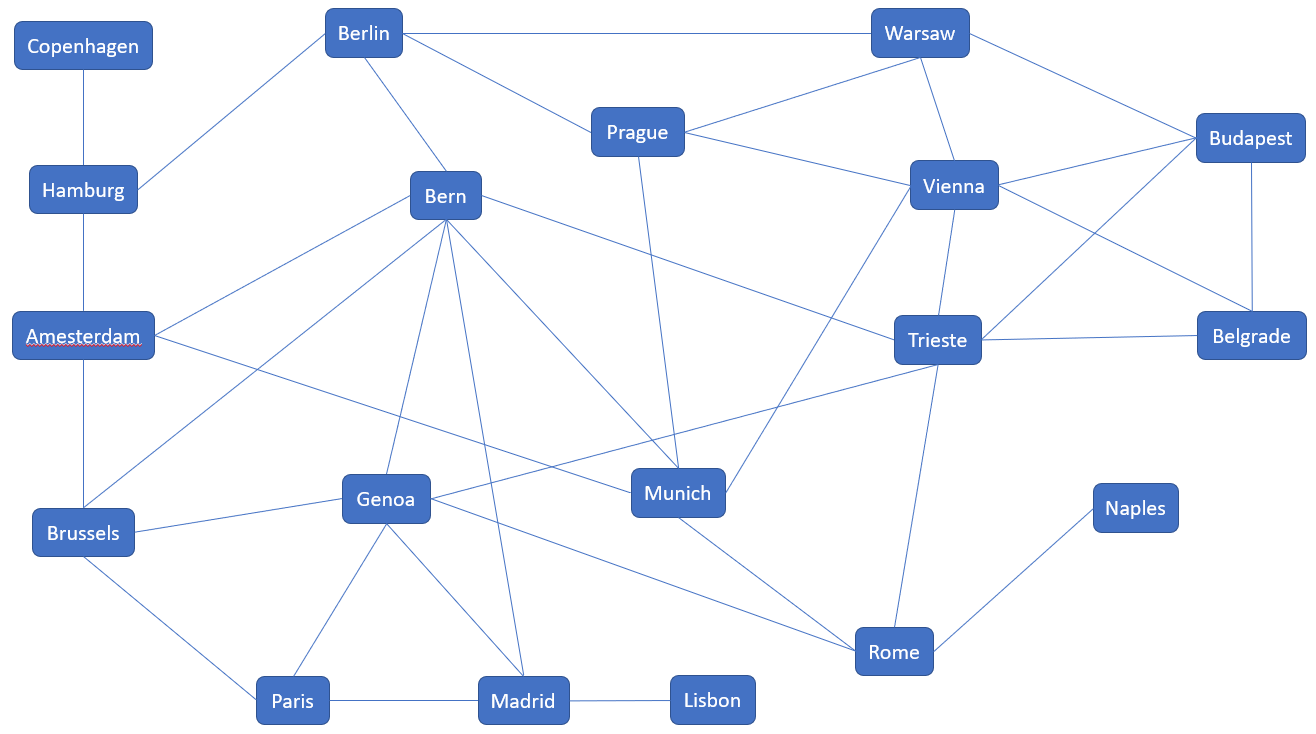

### Graphe des coûts entre les villes

In [2]:
Gd=dict()
Gd['copenhagen']=[180]
Gd['hamburg']=[338, 182, 180]
Gd['berlin']=[628, 219, 345, 182]
Gd['warsaw']=[479, 464, 394, 345]
Gd['amesterdam']= [526, 558, 164, 338]
Gd['brussels']= [497,740,225,164]
Gd['prague']=[185,174,219]
Gd['paris']=[629,805,225]
Gd['bern']=[311,489,304,1104,628,558,497]
Gd['munich']=[280,582, 526, 174, 311]
Gd['vienna']=[155, 317, 501, 185, 280]
Gd['budapest']=[384, 263,403]
Gd['belgrade']=[403, 501, 263]
Gd['trieste']=[361,442, 489, 317, 384, 403]
Gd['genoa']=[951,328, 629, 304, 361,740]
Gd['rome']=[134, 582, 442, 328]
Gd['naples']=[134]
Gd['madrid']=[339, 508, 1104, 951]
Gd['libson'] = [339]

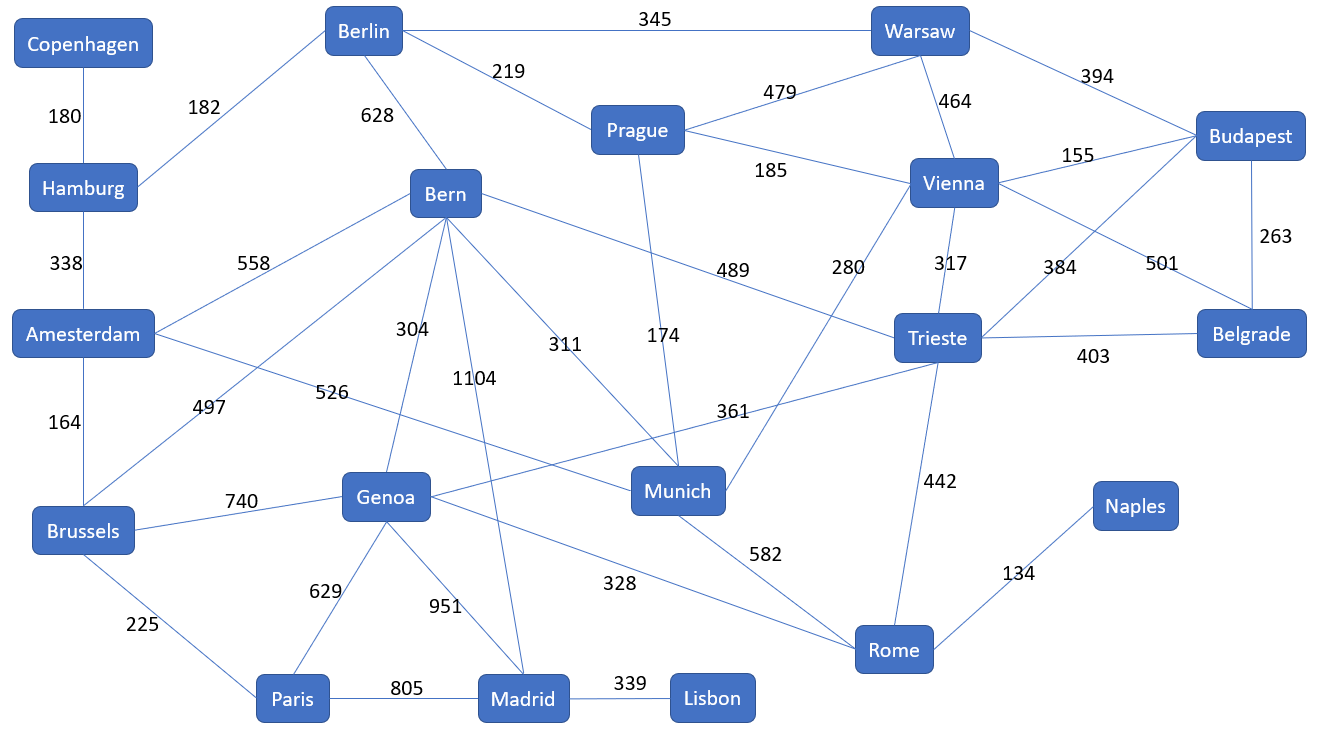

### Les coordonnées des villes

In [3]:
Gc=dict()
Gc['copenhagen'] =(4937, 9500)
Gc['hamburg'] = (5562 , 8437)
Gc['berlin'] = (4500 , 8125)
Gc['warsaw'] = (2437 , 8250)
Gc['amesterdam'] = (6875 , 7875)
Gc['brussels'] = (7062 , 7125)
Gc['prague'] = (4125 , 7000)
Gc['paris'] = (7625 , 6250)
Gc['bern'] = (6125 , 5875)
Gc['munich'] = (4875 , 6000)
Gc['vienna'] = (3437 , 6250)
Gc['budapest'] = (2625 , 6062)
Gc['belgrade'] = (1937 , 4937)
Gc['trieste'] = (3937 , 5187)
Gc['genoa']= (5625 , 4375)
Gc['rome'] = (4312 , 3250)
Gc['madrid'] = (9875 , 2750)
Gc['naples'] = (3625 , 2875)
Gc['lisbon'] = (11625 , 2125)

### Importation des backages à utiliser

In [4]:
from timeit import default_timer as timer
from datetime import timedelta
from math import sqrt
from collections import deque
import random
import numpy as np

<center><h1> I. Les algorithmes non-informés</h1></center>

## 1. Une reherche en profondeur (DFS):

### a. Algorithme

Données : 
<ul>
  <li>graphe <b>G</b></li>
  <li> <b>marque</b> des sommets (initialisé à Faux) </li>
   <li><b>chemin</b> le chemin parcouru </li>
  <li>père <b> "start" </b> des sommets</li>
  <li><b> "goal" </b> le but</li>
</ul>
<br/>
<i>fonction <b>DFS_Récursive(G,start, goal)</b><br/>
début <br/>
   &emsp; marque[start] ← Vrai ;<br/>
    &emsp; ajouter (chemin, start) <i >// ajouter le sommet actuel dans le chemin parcouru</i><br/> 
    &emsp; si start := gaol alors<br/>
     &emsp; &emsp;    retourner (chemin)<br/>
      &emsp;   pour chaque v voisin de start faire<br/>
          &emsp; &emsp; &emsp;   si v non marqué alors<br/>
    &emsp; &emsp; &emsp; &emsp;<b>DFS_Récursive(v) </b>;<br/>
           &emsp; &emsp; &emsp;  fin<br/>
        &emsp; &emsp; fin<br/>
fin </i>

### b. La fonction

In [5]:
def dfs(graph, start, goal, path, visited = set()):
    path.append(start) #ajouter le noeud courant au chemin resultat
    visited.add(start) #ajouter le noeud courant au liste des noeuds visités
    if start == goal:
        return path #retourner le chemin final 
    for neighbour in graph[start]: #parcourir la liste des fils 
        if neighbour not in visited:
            result = dfs(graph, neighbour, goal, path, visited) #passer au noeud suivant
            if result is not None:
                return result
    path.pop() #supprimer le noeud s'il n'est pas un fils du noeud actuel
    return None

### c. L'appelation de la fonction

In [6]:
def dfs_result(g,start,goal):
    new_path=[]
    begin = timer() # à t=0
    new_path = dfs(G, start,goal, new_path)
    end= timer() # aprés l'exécution de la fonction
    total = 0
    for i in range(0,len(new_path)-1): #calcul la somme des distances entre 2 noeuds
        total+=Gd[new_path[i]][G[new_path[i]].index(new_path[i+1])]
    print("Chemin parcouru de",start,"à" ,goal,"est:")
    print(*new_path,sep = " => ")
    print('Nombres de villes visitées (noeuds):', len(new_path))
    print("Distance totale: ",total,"km")
    print("Temps d’exécution: ",timedelta(seconds=end-begin) ) #temps d’exécution

In [7]:
dfs_result(G, 'paris', 'vienna')

Chemin parcouru de paris à vienna est:
paris => genoa => madrid => bern => munich => vienna
Nombres de villes visitées (noeuds): 6
Distance totale:  3275 km
Temps d’exécution:  0:00:00.000014


### d. Le graphe représentatif

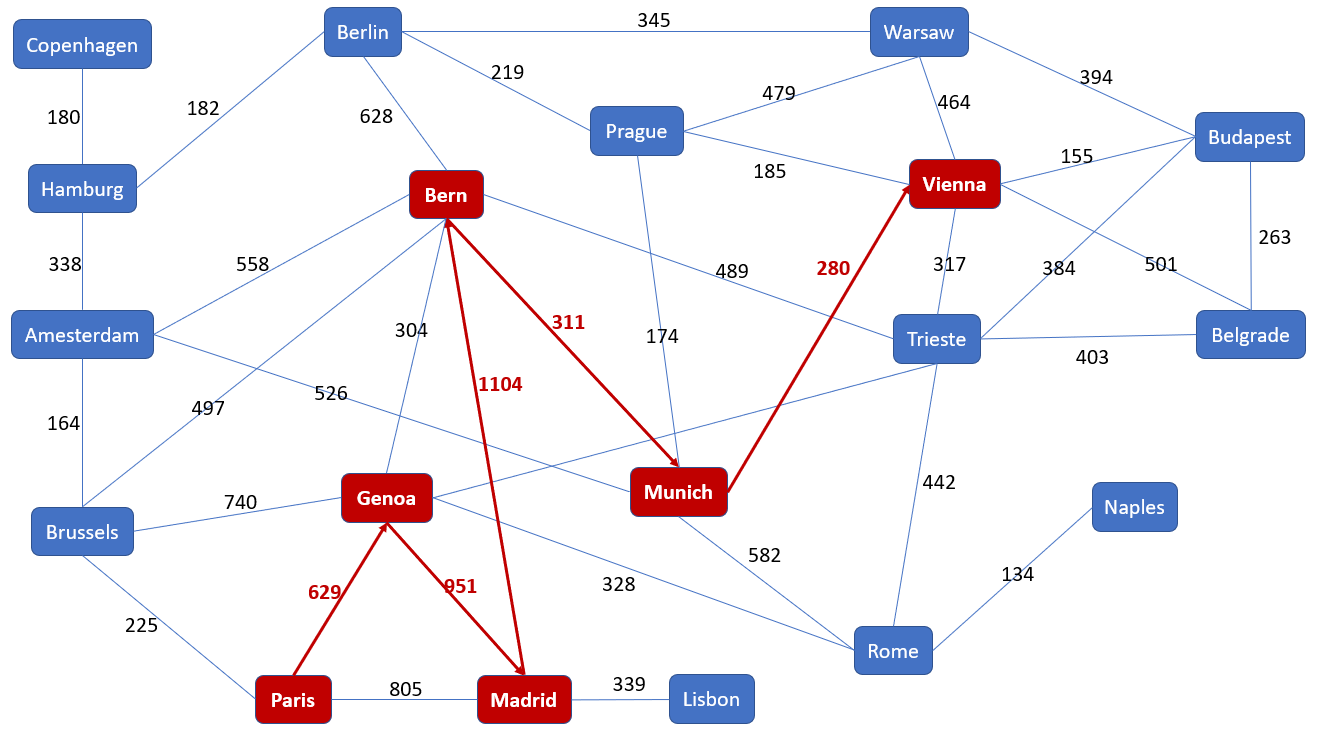

## 2. Une recherche en largeur (BFS):

### a. Algorithme

Données :
    <ul>
  <li>graphe <b>G</b></li>
  <li> <b>marque</b> des sommets (initialisé à Faux) </li>
   <li>File<b> queue </b> (initialisée à vide) </li>
  <li>père <b> "start" </b> des sommets</li>
  <li><b> "goal" </b> le but</li>
</ul>

<i>fonction <b>BFS(G,start, goal)</b><br/>
<i>début<br/>
&emsp; marque[start] ← Vrai ;<br/>
 &emsp; &emsp;enfiler start à la fin de queue ;<br/>
 &emsp; &emsp;tant que queue non vide faire<br/>
 &emsp; &emsp; &emsp;u ← tête(queue) ;<br/>
 &emsp; &emsp; &emsp;pour chaque v voisin de u faire<br/>
 &emsp; &emsp; &emsp; &emsp;si v non marqué alors<br/>
 &emsp; &emsp; &emsp; &emsp; &emsp;marque[v] ← Vrai ;<br/>
 &emsp; &emsp; &emsp; &emsp; &emsp;enfiler v à la fin de queue ;<br/>
 &emsp; &emsp; &emsp; &emsp;fin<br/>
 &emsp; &emsp; &emsp;fin<br/>
 &emsp; &emsp; &emsp;défiler u de la tête de queue ;<br/>
 &emsp; &emsp;fin<br/>
fin</i>

### b. La fonction 

In [8]:
def BFS(graph, start, goal):
    begin = timer() #à t=0
    explored = [] #liste des noeuds visités
    queue = [[start]]
    if start == goal: 
        print("meme noued")
        return #sortie de la fonction
    while queue: #tant que la file n'est pas vide , parcourir les noeuds
        path = queue.pop(0)
        node = path[-1] #choisir le dernier noeud de la file 
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours: #parcourir les voisins du noeud courant et l'ajouter a new_path (chemin final)
                new_path = list(path)
                new_path.append(neighbour) 
                queue.append(new_path)
                if neighbour == goal:
                    end = timer()  # en arrivant au but, arreter le calcul de temps et retourner le chemin final
                    total = 0
                    for i in range(0,len(new_path)-1):
                        total+=Gd[new_path[i]][G[new_path[i]].index(new_path[i+1])]
                    print("Chemin parcouru de",start,"à" ,goal,"est:")
                    print(*new_path,sep = " => ")
                    print('Nombres de villes visitées (noeuds):', len(new_path))
                    print("Distance totale: ",total,"km")
                    print("Temps d’exécution: ",timedelta(seconds=end-begin) )
                    return explored.append(node)
    print("path n'existe pas!")
    return

### c. L'appelation de la fonction et le résultat

In [9]:
BFS(G, 'paris', 'vienna')

Chemin parcouru de paris à vienna est:
paris => genoa => trieste => vienna
Nombres de villes visitées (noeuds): 4
Distance totale:  1307 km
Temps d’exécution:  0:00:00.000032


### d. Le graphe représentatif

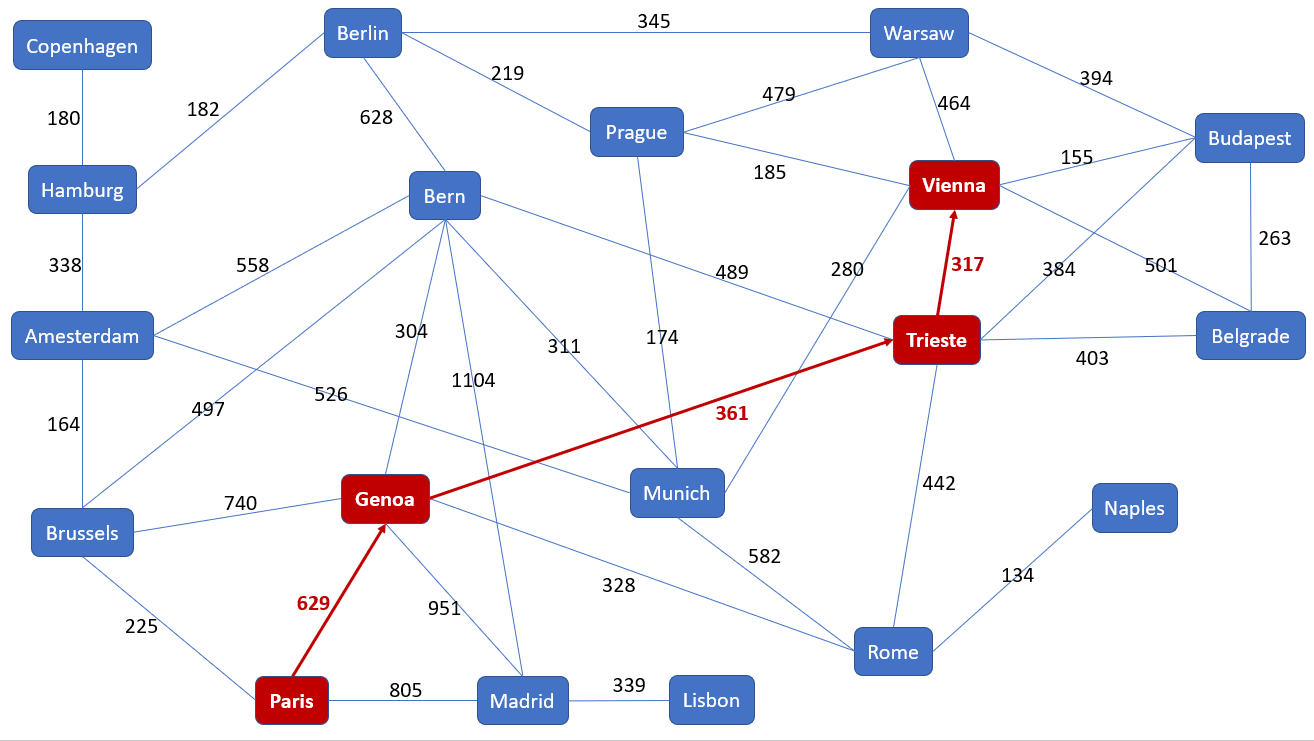

# II. Les algorithmes informés

### Calcule de la distance entre deux noeuds selon leurs coordonnées

In [10]:
def heuristic(point1, point2):
    return 0.1393 * sqrt(((point1[0]-point2[0])**2)+((point1[1]-point2[1]))**2)

#### exemple

In [11]:
heuristic(Gc['copenhagen'], Gc['hamburg'])

171.7741280491914

## 1. Une recherche avec l’algorithme A*:

### a.Algorithme

<b>ouverts</b> = { état initial}
<b>fermés </b> = vide
<b>succès</b> = faux


<i>Tant que (ouverts non vide) et (non succès) faire<br/>
&emsp; choisir n dans les ouverts tel que f(n) est minimum <br/>
&emsp; Si est_final(n) Alors <br/>
&emsp; &emsp;succès = vrai<br/>
&emsp; Sinon 
&emsp; &emsp; ouverts = ouverts privé de n ; <br/>
&emsp; &emsp; fermés = fermés + n<br/>
&emsp; &emsp; Pour chaque successeurs s de n faire<br/>
&emsp; &emsp; &emsp; Si (s n'est ni dans ouverts ni dans fermés) alors <br/>
&emsp; &emsp; &emsp; &emsp; ouverts = ouverts + s <br/>
&emsp; &emsp; &emsp; &emsp; père(s) = n<br/>
&emsp; &emsp; &emsp; &emsp; g(s) = g(n) + coût(n, s)<br/>
&emsp; &emsp; &emsp; Sinon Si (g(s) > g(n) + coût(n,s)) alors <br/>
&emsp; &emsp; &emsp; &emsp; père(s) = n <br/>
&emsp; &emsp; &emsp; &emsp; g(s) = g(n) + coût(n,s)<br/>
&emsp; &emsp; &emsp; FinSi<br/>
&emsp; &emsp; &emsp; Si (s se trouve dans fermés) alors)<br/>
&emsp; &emsp; &emsp; &emsp; fermés = fermés - s<br/>
&emsp; &emsp; &emsp; &emsp; ouverts = ouverts + s<br/>
&emsp; &emsp; &emsp; Finsi<br/>
&emsp; &emsp; Fin Pour<br/>
&emsp; Finsi<br/>
Fin</i>

### b. La fonction

In [12]:
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    #appeler la fonction heuristic() pour calculer sa valeur entre tous les noeuds et le but.
 
    def h(self, n,g):
        H=dict()
        H['copenhagen']=heuristic(Gc[n],Gc[g])
        H['hamburg']=heuristic(Gc[n],Gc[g])
        H['berlin']=heuristic(Gc[n],Gc[g])
        H['warsaw']=heuristic(Gc[n],Gc[g])
        H['amesterdam']=heuristic(Gc[n],Gc[g])
        H['brussels']=heuristic(Gc[n],Gc[g])
        H['prague']=heuristic(Gc[n],Gc[g])
        H['paris']=heuristic(Gc[n],Gc[g])
        H['bern']=heuristic(Gc[n],Gc[g])
        H['munich']=heuristic(Gc[n],Gc[g])
        H['vienna']=heuristic(Gc[n],Gc[g])
        H['budapest']=heuristic(Gc[n],Gc[g])
        H['belgrade']=heuristic(Gc[n],Gc[g])
        H['trieste']=heuristic(Gc[n],Gc[g])
        H['genoa']=heuristic(Gc[n],Gc[g])
        H['rome']=heuristic(Gc[n],Gc[g])
        H['naples']=heuristic(Gc[n],Gc[g])
        H['madrid']=heuristic(Gc[n],Gc[g])
        H['lisbon']=heuristic(Gc[n],Gc[g])
        return H[n]
    
    
    def a_star_algorithm(self, start, stop):
        begin = timer() #à t=0
        open_lst = set([start]) #liste des noeuds non encore explorés
        closed_lst = set([]) #liste des noeuds explorés
        poo = {}
        poo[start] = 0
        par = {}
        par[start] = start
        dist=[]
        while len(open_lst) > 0: #tant qu'il y a des noeuds non encore explorés
            n = None
            for v in open_lst:
                if n == None or poo[v] + self.h(v,stop) < poo[n] + self.h(n,stop):
                    n = v; # choisir n dans les ouverts tel que f(n) est minimum
            if n == None:
                print('Path n"existe pas!')
                return None
            if n == stop:
                reconst_path = []
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
                reconst_path.append(start)
                reconst_path.reverse()
                end = timer()
                for i in range(0,len(reconst_path)-1):
                    dist.append(Gd[reconst_path[i]][G[reconst_path[i]].index(reconst_path[i+1])])
                total = 0
                for i in dist:
                    total += i
                print("Chemin parcouru de",start,"à" ,stop,"est:")
                print(*reconst_path,sep = " => ")
                print('Nombres de villes visitées (noeuds):', len(reconst_path))
                print("Distance totale: ",total,"km")
                print("Temps d’exécution: ",timedelta(seconds=end-begin) )
                return reconst_path,dist
            for m in self.get_neighbors(n): # paroucrir tous les successeurs du noeud n courant
                if m not in open_lst and m not in closed_lst: # m n'est ni dans ouverts ni dans fermés
                    open_lst.add(m) #ajouter m dans la liste ouverte
                    par[m] = n # père(m) = n
                    poo[m] = poo[n] + Gd[m][G[m].index(n)] #g(m)= g(n) + coût(n,m)
                else: 
                    if poo[m] > poo[n] + Gd[m][G[m].index(n)]: #si  g(m) > g(n) + coût(n,m)
                        poo[m] = poo[n] + Gd[m][G[m].index(n)]
                        par[m] = n # père(m) = n
 
                        if m in closed_lst:
                            closed_lst.remove(m) # enlever le noeud m de la liste fermée
                            open_lst.add(m) #et l'ajouter dans la liste ouverte 
            open_lst.remove(n)
            closed_lst.add(n)
        print('Path n"existe pas!')
        return None

### c. L'appelation de la fonction et le résultat

In [13]:
adjac_lis =G
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('paris', 'vienna')

Chemin parcouru de paris à vienna est:
paris => brussels => amesterdam => munich => vienna
Nombres de villes visitées (noeuds): 5
Distance totale:  1195 km
Temps d’exécution:  0:00:00.001555


(['paris', 'brussels', 'amesterdam', 'munich', 'vienna'], [225, 164, 526, 280])

### d. Le graphe représentatif

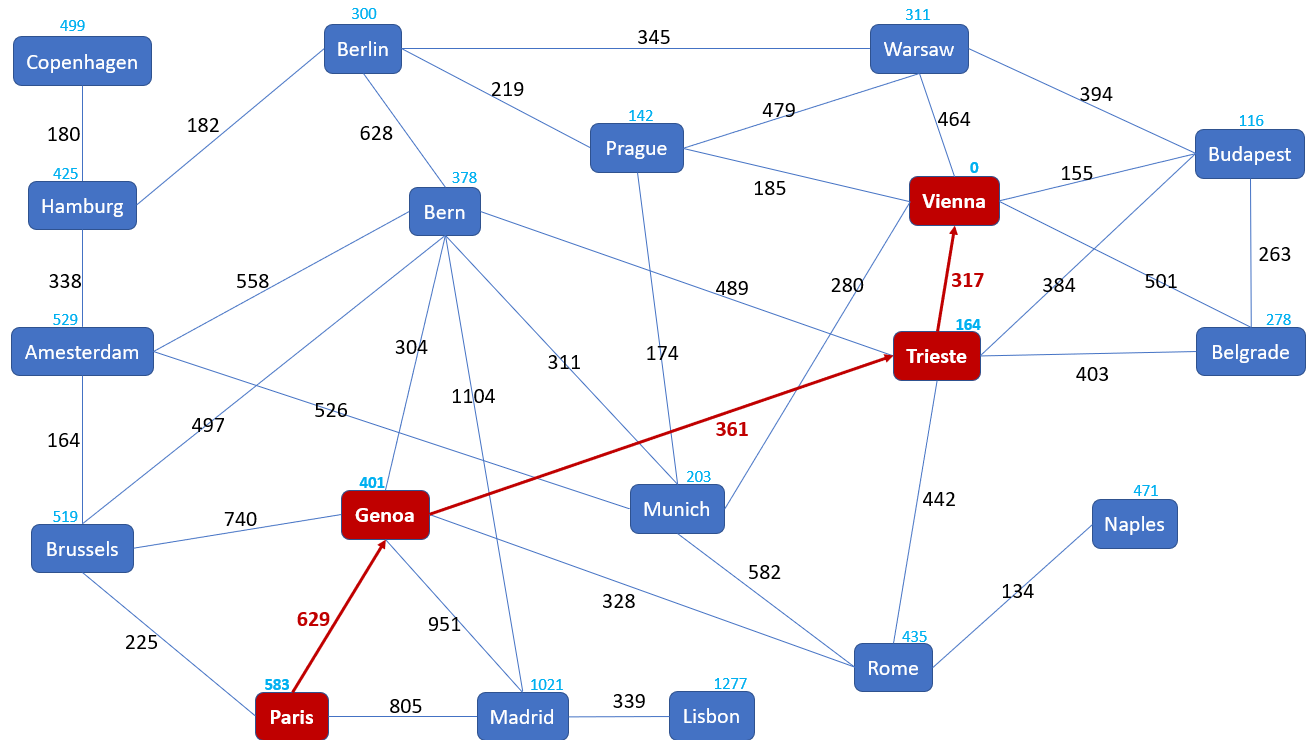

## 2. Une recherche avec l'algorithme Hill Climbing

### a. Algorithme

Données : 
<ul>
  <li>graphe <b>G</b></li>
  <li> <b>marque</b> des sommets (initialisé à Faux) </li>
   <li><b>chemin</b> le chemin parcouru </li>
  <li>père <b> "start" </b> des sommets</li>
  <li><b> "goal" </b> le but</li>
    <li> <b>"h" </b>  les valeurs de la fonction heuristique </li>
</ul>
<br/>
<i>fonction <b>hill_climbing_Récursive(G,start, goal)</b><br/>
début <br/>
   &emsp; marque[start] ← Vrai ;<br/>
    &emsp; ajouter (chemin, start) <i >// ajouter le sommet actuel dans le chemin parcouru</i><br/> 
    &emsp; si start := gaol alors<br/>
     &emsp; &emsp;    retourner (chemin)<br/>
      &emsp;   pour chaque v voisin de start faire<br/>
          &emsp; &emsp; &emsp;   si v non marqué et h[start] >= h[v] alors<br/>
    &emsp; &emsp; &emsp; &emsp;<b>hill_climbing_Récursive(v) </b>;<br/>
           &emsp; &emsp; &emsp;  fin<br/>
        &emsp; &emsp; fin<br/>
fin </i>

### b. Calcul de la fonction heuristique par rapport au noeud but

In [14]:
def objective(g,goal):
    objective=dict()
    for k,i in list(g.items()):
        objective[k]=heuristic(Gc[k],Gc[goal])
    return objective

In [15]:
objective (G,'vienna')

{'copenhagen': 498.61811852859904,
 'hamburg': 424.77579296266407,
 'berlin': 300.2422060887843,
 'warsaw': 311.48426926572074,
 'amesterdam': 529.7150423631653,
 'brussels': 519.4648102253897,
 'prague': 141.77455533190715,
 'paris': 583.3884,
 'bern': 378.0646397123249,
 'munich': 203.31807308884277,
 'vienna': 0.0,
 'budapest': 116.10368792213279,
 'belgrade': 277.6919907393982,
 'trieste': 163.6386099330167,
 'genoa': 401.3911794382259,
 'rome': 435.3125,
 'naples': 470.8663305024155,
 'madrid': 1020.7738617928851,
 'lisbon': 1277.1536412549628}

In [16]:
objective(G,'brussels')

{'copenhagen': 443.93338640217183,
 'hamburg': 277.6002610491568,
 'berlin': 383.10903834229754,
 'warsaw': 663.0482460292766,
 'amesterdam': 107.67349365470595,
 'brussels': 0.0,
 'prague': 409.4944741471611,
 'paris': 144.93855403949632,
 'bern': 217.61446713352953,
 'munich': 342.5928805259386,
 'vienna': 519.4648102253897,
 'budapest': 635.564367512544,
 'belgrade': 776.2519091318294,
 'trieste': 512.2276935073015,
 'genoa': 432.2223107797769,
 'rome': 661.9040721896566,
 'naples': 761.3923032549056,
 'madrid': 724.5420582941063,
 'lisbon': 942.9382454598021}

### c. Trier les noeuds selon l'ordre croissant de leur fonction heuristique

In [17]:
def tri(tab,goal):
    g=tab.copy()
    for i in range(len(g)):
        min = i
        for j in range(i+1, len(g)):
            if heuristic(Gc[g[min]],Gc[goal]) > heuristic(Gc[g[j]],Gc[goal]): 
                min = j
                
        tmp = g[i]
        g[i] = g[min]
        g[min] = tmp
    return g

### d. La fonction hill_climbing

In [18]:
def hill_climbing(g, start, goal, path, visited = set()):
        graph=g.copy()
        path.append(start) #ajouter le noeud courant au chemin resultat
        visited.add(start) #ajouter le noeud courant au liste des noeuds visités
        Gh=objective(graph,goal)
        if start == goal: 
            return path #retourner le chemin final 
        for neighbour in tri(graph[start],goal): #parcourir la liste des fils 
            if (Gh[start] >= Gh[neighbour]) and (neighbour not in visited): #tester le plus petite valeur de h()
                result=hill_climbing(graph, neighbour, goal, path) #passer au noeud suivant
                if result is not None:
                    return result
        #path.pop() #supprimer le noeud s'il n'est pas un fils du noeud actuel
        return "Pas de solution"

### e. L'appelation de la fonction hill_climbing 

In [19]:
def HC_result(g,start,goal):
    new_path=[]
    begin = timer()
    new_path = hill_climbing(g,start,goal,new_path)
    end= timer()
    total = 0
    for i in range(0,len(new_path)-1):
        total+=Gd[new_path[i]][G[new_path[i]].index(new_path[i+1])]
    print("Chemin parcouru de",start,"à" ,goal,"est:")
    print(*new_path,sep = " => ")
    print('Nombres de villes visitées (noeuds):', len(new_path))
    print("Distance totale: ",total,"km")
    print("Temps d’exécution: ",timedelta(seconds=end-begin) )

### f. Résultat 

In [20]:
HC_result(G, 'paris', 'vienna')

Chemin parcouru de paris à vienna est:
paris => genoa => trieste => vienna
Nombres de villes visitées (noeuds): 4
Distance totale:  1307 km
Temps d’exécution:  0:00:00.000182


### g. Graphe représentatif

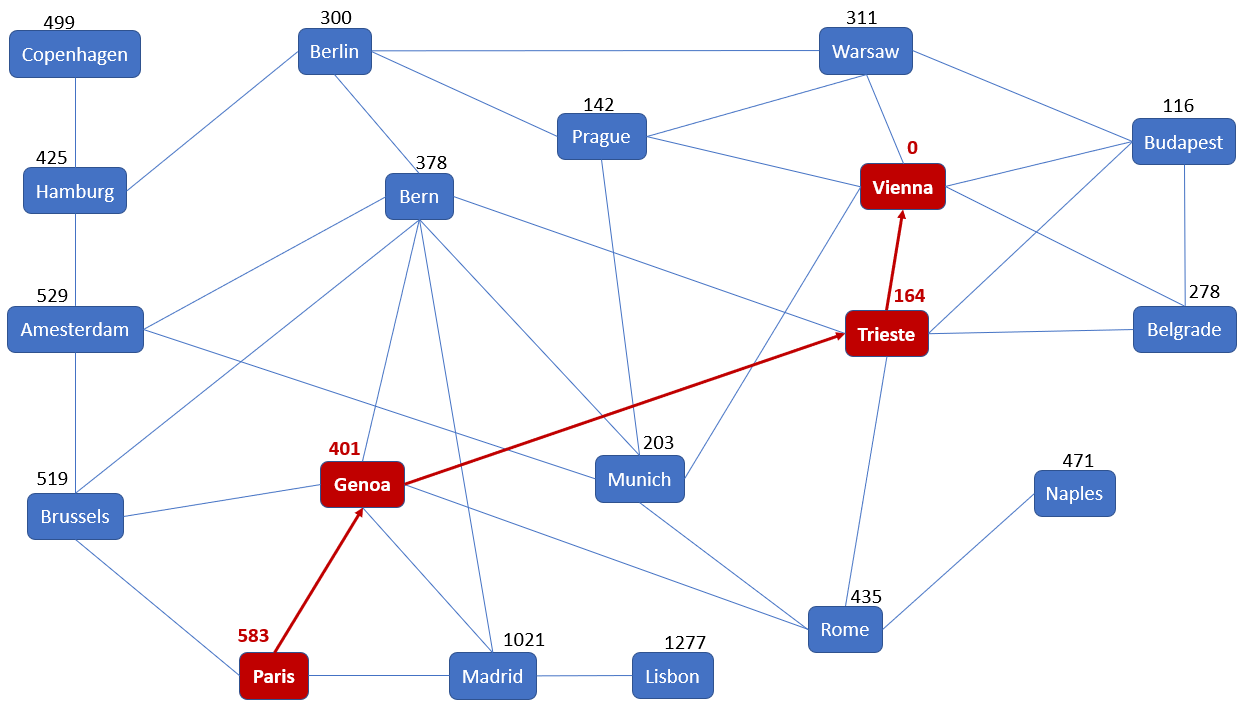

In [21]:
HC_result(G, 'genoa', 'brussels')

Chemin parcouru de genoa à brussels est:
genoa => brussels
Nombres de villes visitées (noeuds): 2
Distance totale:  740 km
Temps d’exécution:  0:00:00.000100


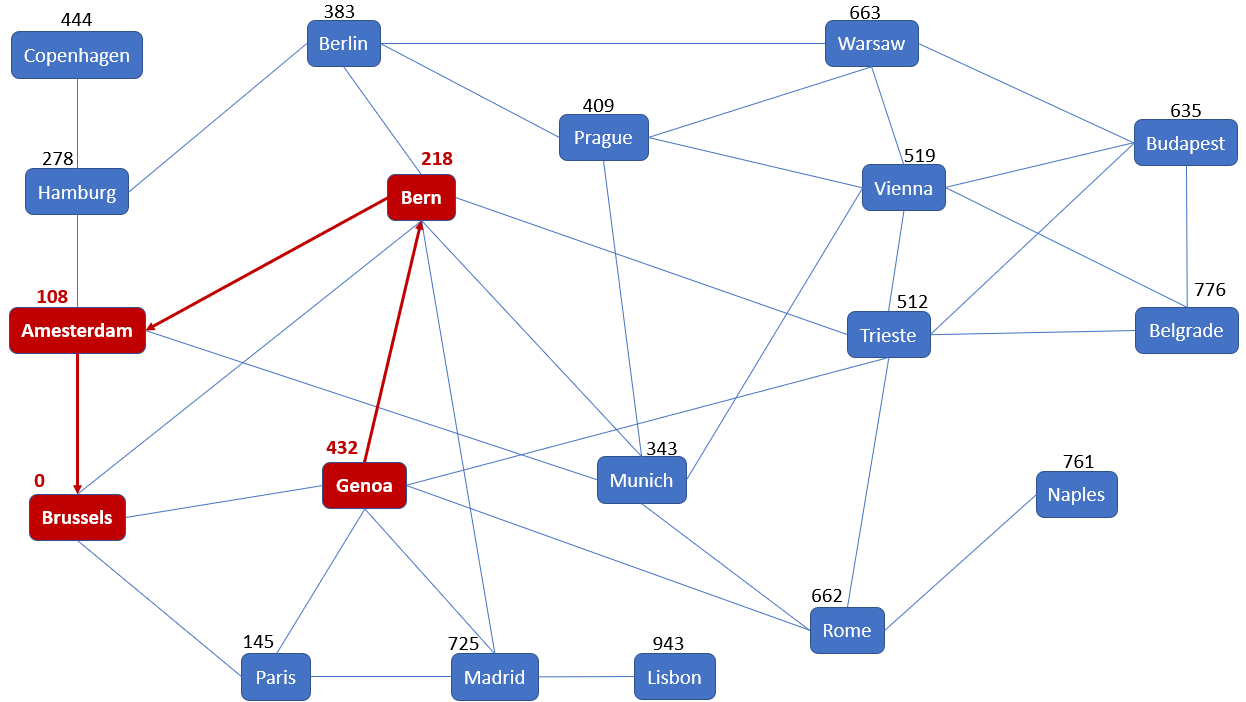

## 4. Etude comparative des quatre méthodes:

### a.  Résultats:

<table>
  <tr>
    <th></th>
    <th><center>Recherche en profondeur (DFS)</center></th>
    <th><center>Recherche en largeur (BFS)</center></th>
     <th><center> A*</center></th>
     <th><center>Hill Climbing</center></th>
  </tr>
  <tr>
    <td>Nombre de nœuds</td>
    <td><center>6</center></td>
    <td><center>4</center></td>
    <td><center>4</center></td>
    <td><center>4</center></td>
  </tr>
  <tr>
    <td>Temps d’exécution (en millisecondes) </td>
    <td><center>00.000007</center></td>
    <td><center>00.000015</center></td>
    <td><center>00.000325</center></td>
    <td><center>00.000202</center></td>
  </tr>
</table>

### b.  Conclusion:

<b><span>&#10230; </span> Dans cet exemple, on observe que la méthode de recherche en profondeur (DFS) est la meilleur en terme de temps d'exécution. Par contre, le nombre de nœuds est superieur de celles des autres méthodes de recherche ( Hill-Climbing, A* et BFS).  </b> 


<b><span>&#10230; </span>La méthode BFS donne le plus court chemin de Paris à Vienna en terme de temps d'exécution et nombre de nœuds. </b> 